In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 710 kB/s 
Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import cleaned versions of files from own drive

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1CzVHKjnPvIKRRwx9GyYSpBnnzWs1eeaI/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1pIVkfKtwLDlrojQknc_A8f7WDpNWViCG/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

#pep8(_ih)

In [ ]:
#### run only once!!!


# get product price and name into orderlines df
orderlines = orderlines.merge(products.filter(['sku', 'price', 'name', 'type']), how='left', on='sku')
# get status into orderliens df
orderlines = orderlines.merge(orders.filter(['order_id', 'state', 'total_paid']).rename(columns={'order_id' : 'id_order'}), how='left', on='id_order')
# set date to datetime type
orderlines['date'] = pd.to_datetime(orderlines['date'])


In [ ]:
# drop orders with missing price
orderlines.dropna(axis=0, subset={'price'}, inplace=True)

In [ ]:
# get years, months
orderlines = (orderlines.assign(year = orderlines['date'].dt.strftime('%Y'), 
                                 month = orderlines['date'].dt.strftime('%b'),
                                 day = orderlines['date'].dt.strftime('%d'),
                                 wday = orderlines['date'].dt.strftime('%a'),
                                 year_month = orderlines['date'].dt.strftime('%Y-%m') )
                        .sort_values('year_month')
)
orderlines.info()
orderlines.head(2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 285001 entries, 0 to 293742
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                285001 non-null  int64         
 1   id_order          285001 non-null  int64         
 2   product_id        285001 non-null  int64         
 3   product_quantity  285001 non-null  int64         
 4   sku               285001 non-null  object        
 5   unit_price        285001 non-null  float64       
 6   date              285001 non-null  datetime64[ns]
 7   total_price       285001 non-null  float64       
 8   check_orders      285001 non-null  bool          
 9   price             285001 non-null  float64       
 10  name              285001 non-null  object        
 11  type              284819 non-null  object        
 12  state             285001 non-null  object        
 13  total_paid        285001 non-null  float64       
 14  year

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,price,name,type,state,total_paid,year,month,day,wday,year_month
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,34.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,11865403,Shopping Basket,18.99,2017,Jan,01,Sun,2017-01
14282,1153195,312381,0,1,WOE0007,7.99,2017-01-20 09:43:49,7.99,True,9.99,Wowewa Protector Tempered Glass iPhone 6 / 6S,13555403,Shopping Basket,7.99,2017,Jan,20,Fri,2017-01


In [ ]:
# get black Friday
#orderlines['black_fri'] = 0
#orderlines.loc[(orderlines['year'] == "2017" & orderlines['month']== "Nov" & orderlines['day'] == "24") | (orderlines['year'] == "2018" & orderlines['month']== "Nov" & orderlines['day'] == "23"), 'black_fri'] = 1
#orderlines['black_fri'] = orderlines.apply(lambda x : True if (('2017-11-24' in x['date'].values) | ('2018-11-23' in x['date'].values)) else False)
orderlines['black_fri'] = (orderlines['year'] == "2017") & (orderlines['month']== "Nov") & (orderlines['day'] == "24") | (orderlines['year'] == "2018") & (orderlines['month']== "Nov") & (orderlines['day'] == "23")

orderlines.info()
orderlines.query('month == "Nov"').sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285001 entries, 0 to 293742
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                285001 non-null  int64         
 1   id_order          285001 non-null  int64         
 2   product_id        285001 non-null  int64         
 3   product_quantity  285001 non-null  int64         
 4   sku               285001 non-null  object        
 5   unit_price        285001 non-null  float64       
 6   date              285001 non-null  datetime64[ns]
 7   total_price       285001 non-null  float64       
 8   check_orders      285001 non-null  bool          
 9   price             285001 non-null  float64       
 10  name              285001 non-null  object        
 11  type              284819 non-null  object        
 12  state             285001 non-null  object        
 13  total_paid        285001 non-null  float64       
 14  year

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,price,name,type,state,total_paid,year,month,day,wday,year_month,black_fri
172255,1454879,446743,0,1,BOS0065,301.93,2017-11-27 00:46:39,301.93,True,379.00,Quietcomfort Bose Bluetooth Headset 35 II MFi ...,5384,Shopping Basket,301.93,2017,Nov,27,Mon,2017-11,False
150787,1418591,430305,0,2,APP2446,389.00,2017-11-21 15:08:45,778.00,True,449.33,Apple iPhone 6 32GB Space Gray,21561716,Shopping Basket,778.00,2017,Nov,21,Tue,2017-11,False
153868,1423533,432708,0,1,OWC0008,37.19,2017-11-22 23:44:04,37.19,True,72.99,OWC Data Doubler Optical Bay Adapter Mac Mini ...,12755395,Shopping Basket,348.84,2017,Nov,22,Wed,2017-11,False
142026,1398253,422309,0,1,GRT0448,19.99,2017-11-05 23:28:25,19.99,True,29.99,Griffin Survivor iPhone Case Journey 8 Plus / ...,11865403,Shopping Basket,19.99,2017,Nov,05,Sun,2017-11,False
181519,1468417,452011,0,1,APP2495,626.00,2017-11-29 19:44:56,626.00,True,639.00,Apple iPhone 32GB Black Bright 7,85641716,Completed,626.00,2017,Nov,29,Wed,2017-11,False


In [ ]:
# where the shipping costs are...
(orderlines
  .groupby('id_order')
  .agg({'total_price' : 'sum'})
  .reset_index()
  .merge(orderlines[['id_order', 'total_paid']], how='left', on='id_order')
  .query('total_paid-total_price > 1')
  .head(3)

,id_order,total_price,total_paid
1,241423,129.16,136.15
2,242832,10.77,15.76
3,243330,77.99,84.98
4,243784,153.87,157.86
6,245595,105.98,112.97
...,...,...,...
284955,527358,27.98,31.97
284959,527362,112.00,118.99
284963,527366,213.99,220.98
284990,527391,49.99,54.98


In [ ]:
#estimate discount, relative discount, binary 'sold' variable
orderlines['discount'] = orderlines.price - orderlines.unit_price
orderlines['discount'].loc[orderlines['discount']<0] = 0
orderlines['discount_rel'] = orderlines.discount / orderlines.price
orderlines['discount_rel2'] = orderlines['discount_rel']**2
orderlines['discount_p'] = orderlines.discount_rel*100
orderlines['discount_p2'] = orderlines['discount_p']**2
orderlines['total_discount'] = orderlines['discount'] * orderlines['product_quantity']
orderlines['any_discount'] = (orderlines.discount > 0) #& (orderlines.discount <0.01)
orderlines['sold'] = orderlines.state.apply(lambda x : 1 if x == 'Completed' else 0)
orderlines.head()

#orderlines.discount.describe()
#orderlines.query('discount < 0.1').shape # 26905 cases
#orderlines.query('discount < 1').shape # 30821 cases
#orderlines.query('discount < 0.1').discount.hist()
#orderlines.query('discount < -1000')
#orderlines.query('(discount < 0.1) and (discount > -100)', engine='python').discount.hist(bins=20)
#orderlines.query('id ==1197439')
#orderlines.query('discount < 0.1').discount.hist(bins=20)
orderlines.query("unit_price<=0 & sold ==1").shape 
#orderlines.query('discount <0.1 & sold==True').shape # (4332, 27)
#orderlines.query('discount==0').shape # (14422, 23)
orderlines.query('id ==1268645')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,price,...,year_month,black_fri,discount,discount_rel,discount_rel2,discount_p,discount_p2,total_discount,any_discount,sold
76831,1268645,365886,0,1,APP1465,-119.0,2017-06-15 12:48:54,-119.0,True,119.0,...,2017-06,False,238.0,2.0,4.0,200.0,40000.0,238.0,True,0


In [ ]:
orderlines = orderlines.query('id !=1197439')
orderlines = orderlines.query('id !=1268645')

#orderlines['discount'].loc[orderlines['discount']<0] = 0

In [ ]:
orderlines.type.fillna('', inplace=True)
orderlines['Category'] = 'Accessory'
orderlines['Category'].loc[orderlines.type.isin(["1,02E+12", "2,17E+11" , "5,39E+11", "5,44E+11" , "21622158", "21632158", "5,45E+15", "9,29E+11", "2158", "1282", "51912158", "5,74E+15", "1282", "51882158", "5,43E+15", "5,72E+15", "2,16E+11", "118692158"])] = 'iMac/MacBook'
orderlines['Category'].loc[orderlines.type.isin(["12141714", "42931714", "13621714", "24861714", "51861714", "1714", "51871714", "12051714", "12031714", "106431714", "113851714","24821716", "51601716", "85641716", "24811716", "85651716", "1716", "21571716", "21561716", "113291716", "113281716", "113271716"])] = 'iPad/Phones'
orderlines['Category'].loc[orderlines.name.str.contains("Tablet") | (orderlines.name.str.contains("Phone") & (orderlines.price>400) )] = 'iPad/Phones'
orderlines['Category'].loc[(orderlines.name.str.contains("Watch") & (orderlines.price>200)) | orderlines.type == "11905404"] = 'Watch'
orderlines['Category'].loc[orderlines.name.str.contains('service') | orderlines.name.str.contains('Service') | orderlines.name.str.contains('repair')|orderlines.name.str.contains('Repair') | orderlines.name.str.contains('warranty') | orderlines.type.isin(["1,46E+11"])] = 'Service'
orderlines['Category'].loc[orderlines.type.isin(["1416", "4259"])] = 'Software'
orderlines['Category'].loc[orderlines.type.isin(['11935397', '12655397', '12215397', '12995397', '1276', '1433', '1298', '1404'] )] = 'HardDrive'
orderlines['Category'].loc[(orderlines.name.str.contains("Mini Server", case= False) & (orderlines.price>200)) | (orderlines.name.str.contains("Server", case= False) & (orderlines.price>400)) | orderlines.type.isin([['12175397', '1334', '11935397', '1280', '1298', '12655397']])] = 'Servers'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
orderlines.Category.unique()

array(['Accessory', 'HardDrive', 'iMac/MacBook', 'iPad/Phones', 'Service',
       'Software', 'Servers'], dtype=object)

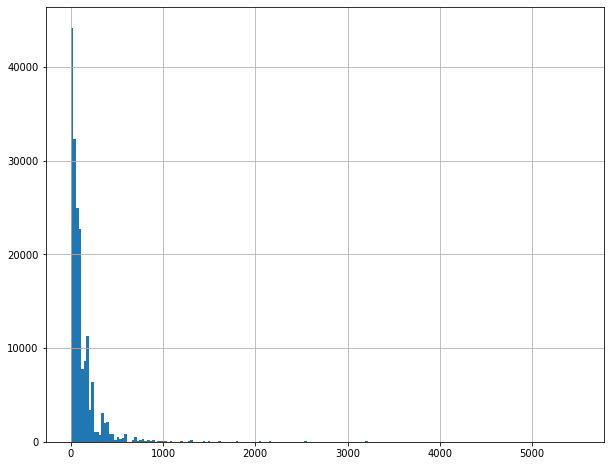

In [ ]:
   fig = plt.figure(figsize = (10,8))
orderlines.query('Category == "Accessory"').price.hist(bins=200)

# analysing discount on sales

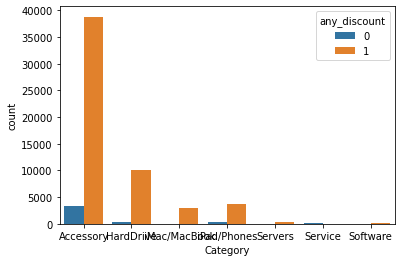

In [ ]:
# prepare data
#create col including (with or without discount)
orderlines['any_discount'] = (orderlines.discount > 0) #& (orderlines.discount <0.01)
orderlines[['discount', 'any_discount']].sample(5)

#create year_month col
orderlines = orderlines.assign(year_month = orderlines['date'].dt.strftime('%Y-%m')).sort_values('year_month')

# create df that only includes sold items
disc_count_df = orderlines.query('sold == True').copy()

# count plot of different ordered items (didn't sum up over product_quantity yet)
sns.countplot(x="Category", hue='any_discount', data=disc_count_df)

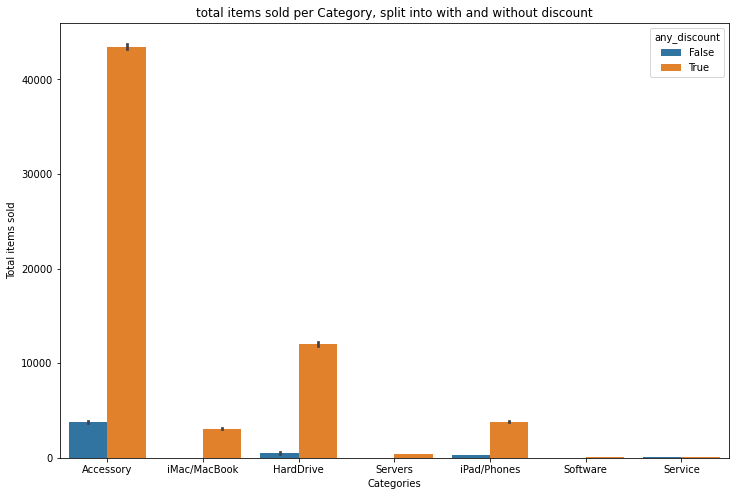

In [ ]:
# total items sold per Category, split into with and without discount
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=disc_count_df, # dataframe we will use to look for the columns information
    x='Category', # x values on our chart
    y='product_quantity', # y values on our chart
    hue='any_discount', # group color in our chart
    estimator = sum # adding up, not showing the mean
)

plt.xlabel('Categories') # x label name
plt.ylabel('Total items sold') # y label name
plt.title('total items sold per Category, split into with and without discount') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

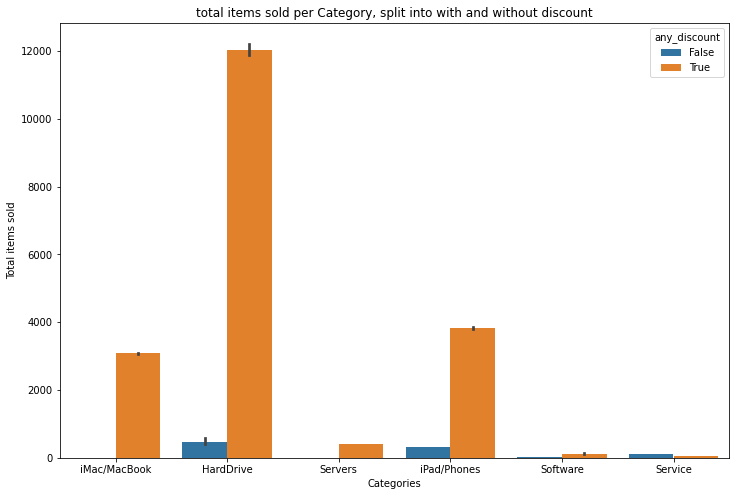

In [ ]:
# total items sold per Category (without Accessories), split into with and without discount
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=disc_count_df.query('Category != "Accessory"'), # dataframe we will use to look for the columns information
    x='Category', # x values on our chart
    y='product_quantity', # y values on our chart
    hue='any_discount', # group color in our chart
    estimator = sum # adding up, not showing the mean
)

plt.xlabel('Categories') # x label name
plt.ylabel('Total items sold') # y label name
plt.title('total items sold per Category, split into with and without discount') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

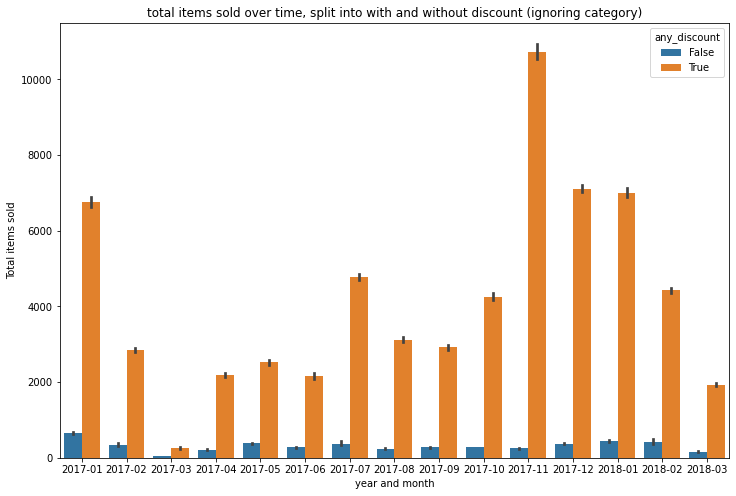

In [ ]:
# total items sold over time with and without discount (ignoring Category)

plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=disc_count_df, # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='product_quantity', # y values on our chart
    hue='any_discount', # group color in our chart
    estimator = sum # adding up, not showing the mean
)

plt.xlabel('year and month') # x label name
plt.ylabel('Total items sold') # y label name
plt.title('total items sold over time, split into with and without discount (ignoring category)') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

In [ ]:
# create monthly df for the following:
#create col including share of discounted items on all items sold

# first make any_discount 0/1 instead of boolean
orderlines['any_discount'] = orderlines['any_discount'].astype(int)

# df per month with total items sold and total items sold with discount
disc_share_m_df = (orderlines
                   .query('sold== True') # only referring to sold products
                   .assign(n_discount = orderlines.product_quantity * orderlines.any_discount) # create col counting discounts given
                   .groupby('year_month')
                   .agg({'n_discount' : 'sum', 'product_quantity' : 'sum'}) # create col for discounts given per month and items sold per month
                   .reset_index()
                   #.rename(columns={'n_discount' : 'n_discount_m'})
                   .sort_values('year_month')
                   .copy()
)

# create col with discount share 
disc_share_m_df['disc_share_m'] = disc_share_m_df.n_discount/ disc_share_m_df.product_quantity

disc_share_m_df.head()
disc_share_m_df.disc_share_m.describe()


KeyError: ignored

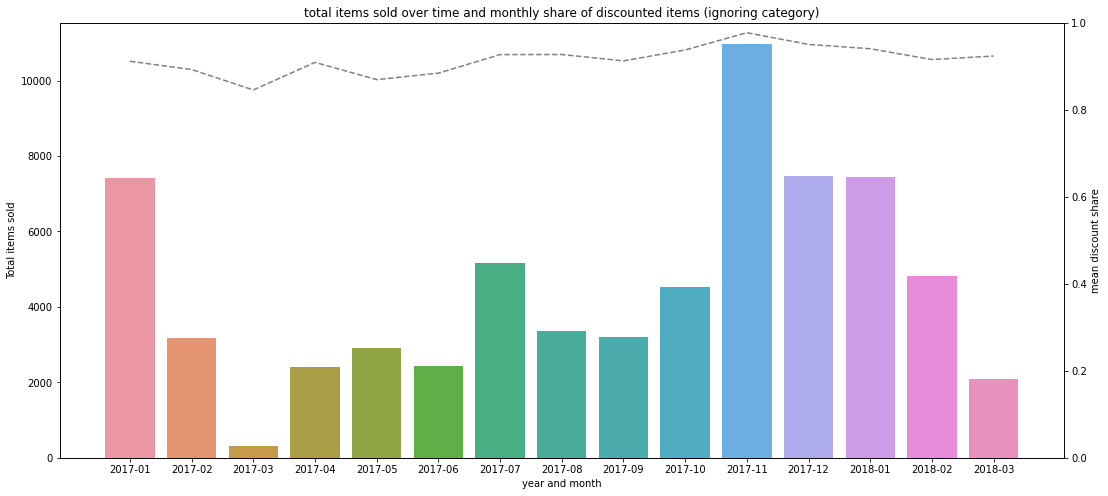

In [ ]:
# total items sold over time with discount share (ignoring Category)

fig, p1 = plt.subplots(figsize=(18, 8),sharex=True, sharey=False)

p1 = sns.barplot(
    data=disc_share_m_df, # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='product_quantity', # y values on our chart
    #hue='any_discount', # group color in our chart
    estimator = sum, # adding up, not showing the mean
    ax=p1
)

# add a horizontal reference line into the chart to know where the discount share was
p1.set_ylabel('Total items sold')
p2 = p1.twinx()

p2.plot(disc_share_m_df['year_month'],
    disc_share_m_df['disc_share_m'], # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'#,
#    ax=p2
)
#p2.axhline(
#    disc_share_m_df['disc_share_m'].mean(), # value where you want to add your reference line
#    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
#    color='gray'#,
#    #ax=p2
#)

p2.set_ylim(0,1)
p2.set_ylabel('mean discount share')

p.figure.legend()
p1.set_xlabel('year and month') # x label name
#p1.set_ylabel('Total items sold') # y label name
#p1.set_ylim(0,12000)
#p2.set_ylabel('') # y label name
#p2.set_ylim(0,0.1)
#ax1.set_xlabel('X data')
#ax1.set_ylabel('Counts', color='g')
#ax2.set_ylabel('Detection Rates', color='b')

plt.title('total items sold over time and monthly share of discounted items (ignoring category)') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

In [ ]:
# same as above but only iMacs and iPads
# create monthyl df for the following:
#create col including share of discounted items on all items sold


# df per month with total items sold and total items sold with discount only referring to iMacs and iPads
disc_share_m_Mac_df = (orderlines
                   .query('(Category in ["iMac/MacBook","iPad/Phones"]) and (sold == True)', engine='python')
                   .assign(n_discount = orderlines.product_quantity * orderlines.any_discount) # create col counting discounts given
                   .groupby('year_month')
                   .agg({'n_discount' : 'sum', 'product_quantity' : 'sum'}) # create col for discounts given per month and items sold per month
                   .reset_index()
                   #.rename(columns={'n_discount' : 'n_discount_m'})
                   .sort_values('year_month')
                   .copy()
)

# create col with discount share 
disc_share_m_Mac_df['disc_share_m'] = disc_share_m_Mac_df.n_discount/ disc_share_m_Mac_df.product_quantity

disc_share_m_Mac_df.head()
disc_share_m_Mac_df.disc_share_m.describe()


count    15.000000
mean      0.941831
std       0.050111
min       0.844828
25%       0.923029
50%       0.948718
75%       0.984093
max       0.997712
Name: disc_share_m, dtype: float64

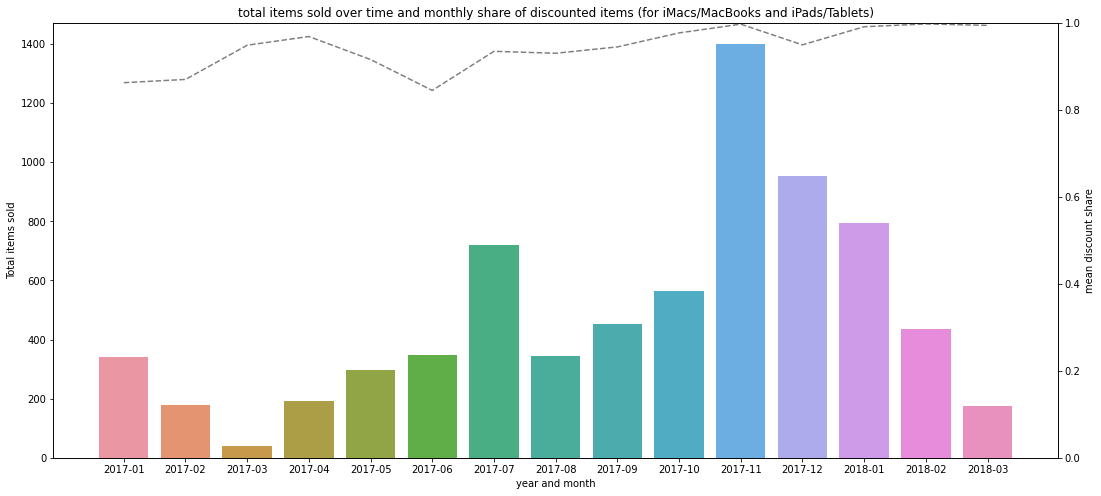

In [ ]:
# total items sold over time with discount share (for iMacs and iPads)

fig, p1 = plt.subplots(figsize=(18, 8),sharex=True, sharey=False)

p1 = sns.barplot(
    data=disc_share_m_Mac_df, # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='product_quantity', # y values on our chart
    estimator = sum, # adding up, not showing the mean
    ax=p1
)

# add a horizontal reference line into the chart to know where the discount share was
p1.set_ylabel('Total items sold')
p2 = p1.twinx()

p2.plot(disc_share_m_Mac_df['year_month'],
    disc_share_m_Mac_df['disc_share_m'], # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)

p2.set_ylim(0,1)
p2.set_ylabel('mean discount share')

p.figure.legend()
p1.set_xlabel('year and month') # x label name

plt.title('total items sold over time and monthly share of discounted items (for iMacs/MacBooks and iPads/Tablets)') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

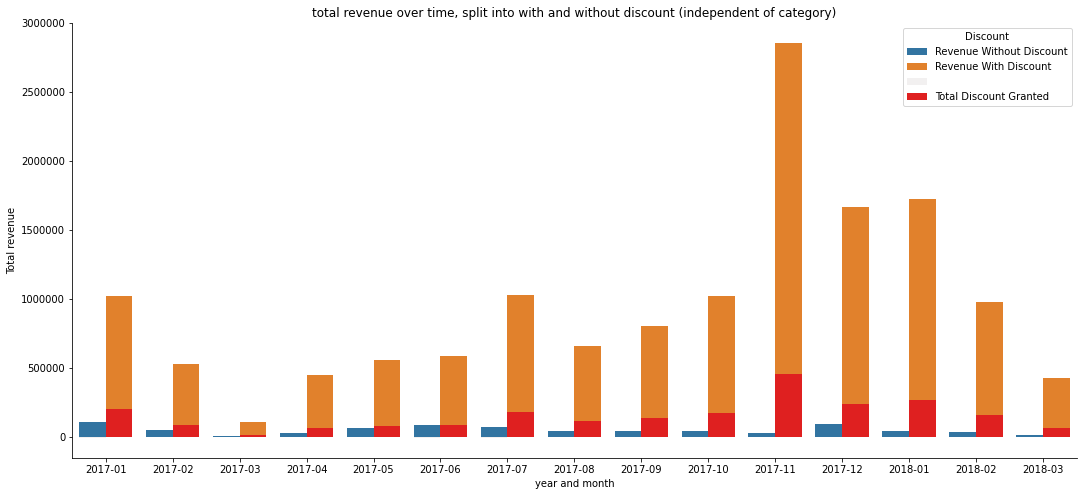

In [ ]:
# looking at total revenue and total discounts given

fig, p1 = plt.subplots(figsize=(18, 8),sharex=True, sharey=False)

p1 = sns.barplot(
    data=orderlines.query('sold == True'), # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='total_price', # y values on our chart
    hue='any_discount',
    estimator = sum , # adding up, not showing the mean
    #ax=p1 ,
    ci=None
)

# add second barplot for the total discount granted

p2 = sns.barplot(
    data=orderlines.query('sold == True'), # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='total_discount', # y values on our chart
    hue='any_discount',
    estimator = sum , # adding up, not showing the mean
    color = 'red',
    ci=None
)


p.figure.legend()
p1.set_xlabel('year and month') # x label name
p1.set_ylabel('Total revenue')

plt.title('total revenue over time, split into with and without discount (independent of category)') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.legend(title='Discount', loc='upper right', labels=['Revenue Without Discount', 'Revenue With Discount', '', 'Total Discount Granted'])
sns.despine()
plt.show() # show the plot

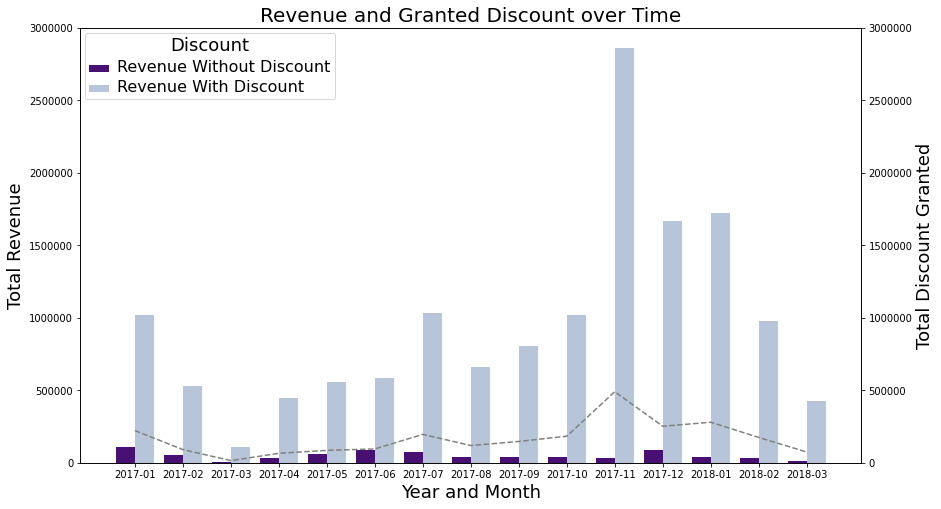

In [ ]:
# as above but line instead of red bar
# looking at total revenue and total discounts given
#sns.color_palette("mako", as_cmap=True)
fig, p1 = plt.subplots(figsize=(14, 8),sharex=True, sharey=True)

p1 = sns.barplot(
    data=orderlines.query('sold == True'), # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='total_price', # y values on our chart
    hue='any_discount',
    estimator = sum , # adding up, not showing the mean
    palette = ['indigo','lightsteelblue'],
    ax=p1 ,
    ci=None
)

plt.legend(title='Discount', labels=['Revenue Without Discount', 'Revenue With Discount'])
plt.setp(p1.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(p1.get_legend().get_title(), fontsize='18') # for legend title

p1.set_ylim(0,3000000)
p1.set_xlabel('Year and Month', fontsize=18) # x label name
p1.set_ylabel('Total Revenue', fontsize=18)
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# add line for the total discount granted

p2 = p1.twinx()

p2.plot(orderlines.query('sold == True').groupby(['year_month']).agg({'discount' : 'sum'}).reset_index()['year_month'],
    orderlines.query('sold == True').groupby(['year_month']).agg({'total_discount' : 'sum'}).reset_index()['total_discount'], # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray',
)

p2.set_ylim(0,3000000)
p2.set_ylabel('Total Discount Granted', fontsize=18)
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

#plt.title('total revenue over time, split into with and without discount (independent of category) and granted discount(--)') # title
plt.title('Revenue and Granted Discount over Time', fontsize=20) # title

plt.show() # show the plot


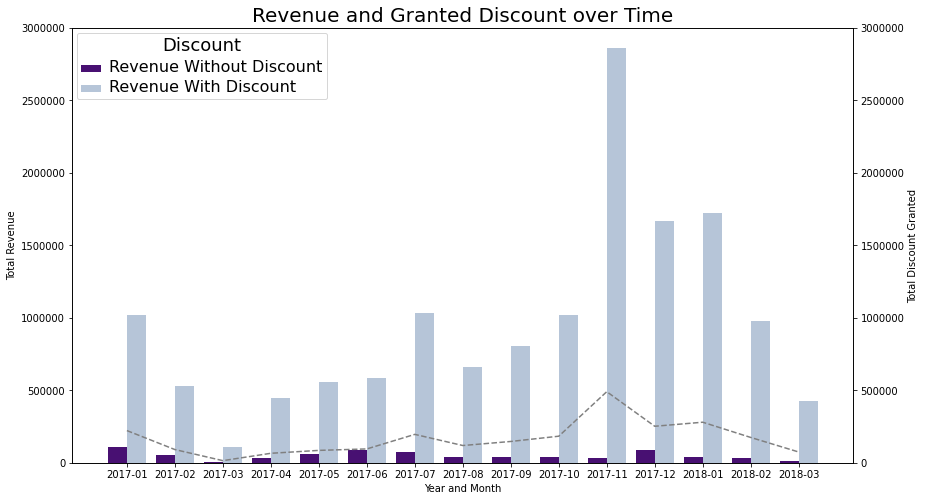

In [ ]:
# as above to check "estimator = sum"
# looking at total revenue and total discounts given
#sns.color_palette("mako", as_cmap=True)
fig, p1 = plt.subplots(figsize=(14, 8),sharex=True, sharey=True)

p1 = sns.barplot(
    data=orderlines.query('sold == True').groupby(['year_month', 'any_discount']).agg({'total_price':'sum'}).reset_index(), # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='total_price', # y values on our chart
    hue='any_discount',
    #estimator = sum , # adding up, not showing the mean
    palette = ['indigo','lightsteelblue'],
    ax=p1 ,
    ci=None
)

plt.legend(title='Discount', labels=['Revenue Without Discount', 'Revenue With Discount'])
plt.setp(p1.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(p1.get_legend().get_title(), fontsize='18') # for legend title

p1.set_ylim(0,3000000)
p1.set_xlabel('Year and Month') # x label name
p1.set_ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# add line for the total discount granted

p2 = p1.twinx()

p2.plot(orderlines.query('sold == True').groupby(['year_month']).agg({'discount' : 'sum'}).reset_index()['year_month'],
    orderlines.query('sold == True').groupby(['year_month']).agg({'total_discount' : 'sum'}).reset_index()['total_discount'], # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray',
)

p2.set_ylim(0,3000000)
p2.set_ylabel('Total Discount Granted')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

#plt.title('total revenue over time, split into with and without discount (independent of category) and granted discount(--)') # title
plt.title('Revenue and Granted Discount over Time', fontsize=20) # title

plt.show() # show the plot


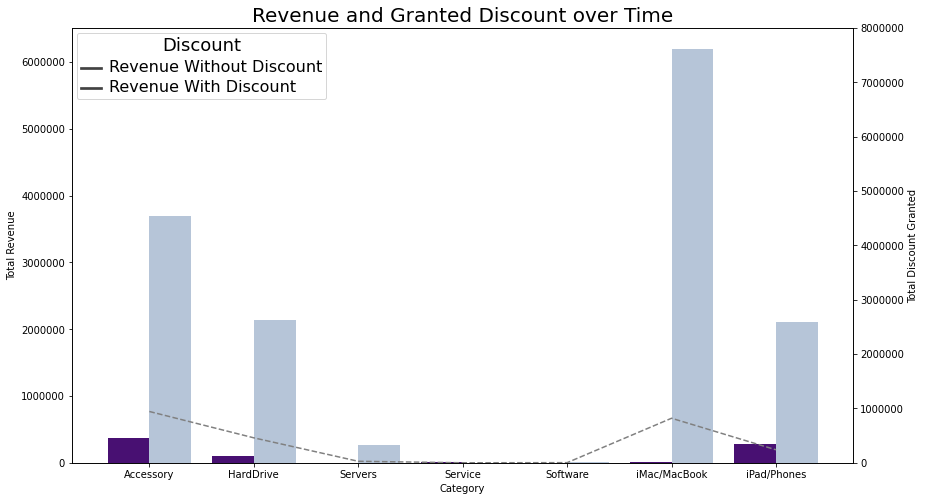

In [ ]:
from pandas.core import groupby
# looking at discounts and revenue by category (not over time)
# as above but line instead of red bar
# looking at total revenue and total discounts given

from numpy import median

fig, p1 = plt.subplots(figsize=(14, 8),sharex=True, sharey=True)

p1 = sns.barplot(
    data=orderlines.query('sold == True').groupby(['Category','any_discount']).agg({'total_price':'sum'}).reset_index(), # dataframe we will use to look for the columns information
    x='Category', # x values on our chart
    y='total_price', # y values on our chart
    hue='any_discount',
    #estimator = np.sum , # adding up, not showing the mean
    palette = ['indigo','lightsteelblue'],
    ax=p1 #,
    #ci=None
)

plt.legend(title='Discount', labels=['Revenue Without Discount', 'Revenue With Discount'])
plt.setp(p1.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(p1.get_legend().get_title(), fontsize='18') # for legend title

#p1.set_ylim(0,8000000)
#p1.set_xlabel('Year and Month') # x label name
p1.set_ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# add line for the total discount granted

p2 = p1.twinx()

p2.plot(orderlines.query('sold == True').groupby(['Category']).agg({'discount' : 'sum'}).reset_index()['Category'],
    orderlines.query('sold == True').groupby(['Category']).agg({'total_discount' : 'sum'}).reset_index()['total_discount'], # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray',
)

p2.set_ylim(0,8000000)
p2.set_ylabel('Total Discount Granted')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

#plt.title('total revenue over time, split into with and without discount (independent of category) and granted discount(--)') # title
plt.title('Revenue and Granted Discount over Time', fontsize=20) # title

plt.show() # show the plot


In [ ]:
orderlines.query('sold == 1').groupby('Category').total_price.sum()

Category
Accessory       4062960.58
HardDrive       2227471.10
Servers          267585.09
Service           10970.89
Software          17050.66
iMac/MacBook    6211453.07
iPad/Phones     2389149.12
Name: total_price, dtype: float64

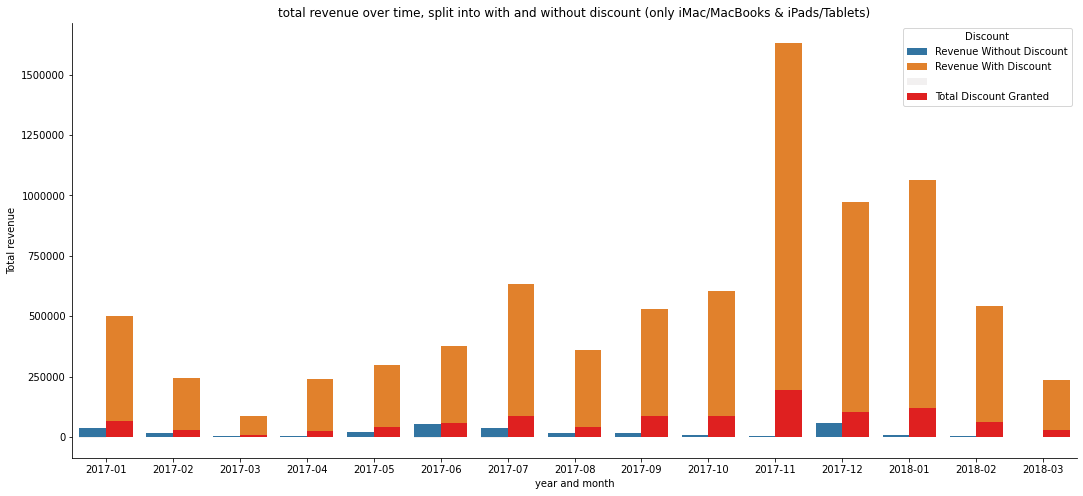

In [ ]:
# looking at total revenue and total discounts given (only iMacs/iPads)

# looking at total revenue and total discounts given

fig, p1 = plt.subplots(figsize=(18, 8),sharex=True, sharey=False)

p1 = sns.barplot(
    data=orderlines.query('(Category in ["iMac/MacBook","iPad/Phones"]) and (sold == True)', engine='python'), # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='total_price', # y values on our chart
    hue='any_discount',
    estimator = sum , # adding up, not showing the mean
    #ax=p1 ,
    ci=None
)

# add second barplot for the total discount granted

p2 = sns.barplot(
    data=orderlines.query('(Category in ["iMac/MacBook","iPad/Phones"]) and (sold == True)', engine='python'), # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='total_discount', # y values on our chart
    hue='any_discount',
    estimator = sum , # adding up, not showing the mean
    color = 'red',
    ci=None
)


p.figure.legend()
p1.set_xlabel('year and month') # x label name
p1.set_ylabel('Total revenue')

plt.title('total revenue over time, split into with and without discount (only iMac/MacBooks & iPads/Tablets)') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.legend(title='Discount', loc='upper right', labels=['Revenue Without Discount', 'Revenue With Discount', '', 'Total Discount Granted'])
sns.despine()
plt.show() # show the plot

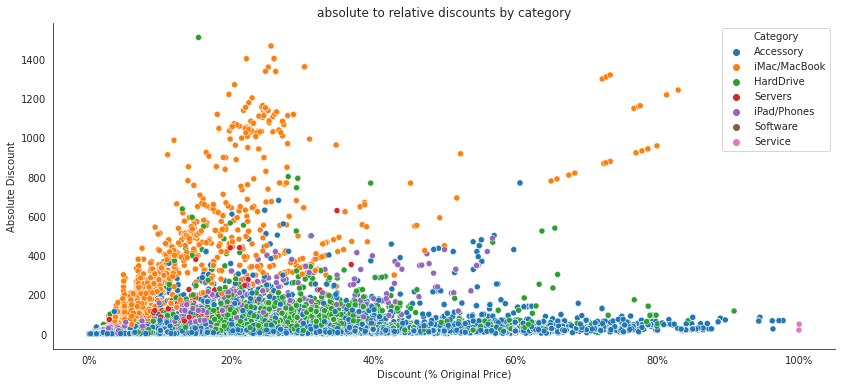

In [ ]:
#investiage discount
# look at discounted products
plt.subplots(figsize=(14, 6))

ax = sns.scatterplot(data=orderlines.query('(any_discount == 1) and (sold == True)', engine='python'), x='discount_rel', y='discount', hue='Category')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(val) for val in vals])
#sns.lineplot(data=p_df, x='disc_p', y='state_perc', hue='year')

#plt.legend(facecolor='white')
plt.title('absolute to relative discounts by category')
plt.ylabel('Absolute Discount')
plt.xlabel('Discount (% Original Price)')
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.show()


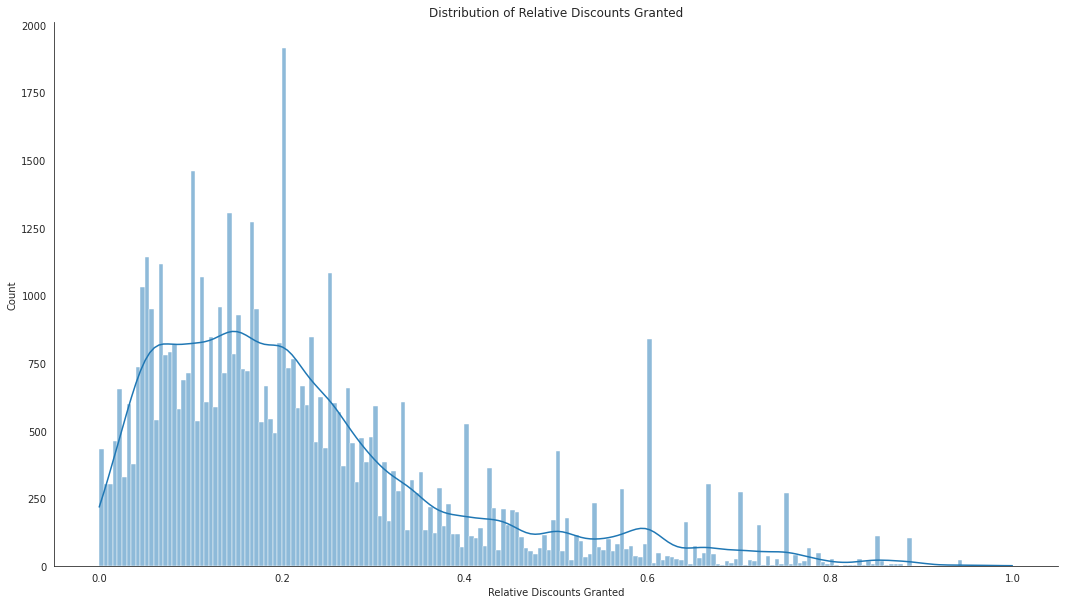

In [ ]:
# histogram of discount_rel
plt.subplots(figsize=(18, 10))

sns.histplot(data=orderlines.query('(any_discount == 1) and (sold == True)'), x='discount_rel',#hue='Category', 
             #alpha=.4, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=200 # define the number of bins the variable total paid will be grouped
            )
sns.set_style("white")

plt.title('Distribution of Relative Discounts Granted')
plt.xlabel('Relative Discounts Granted')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")


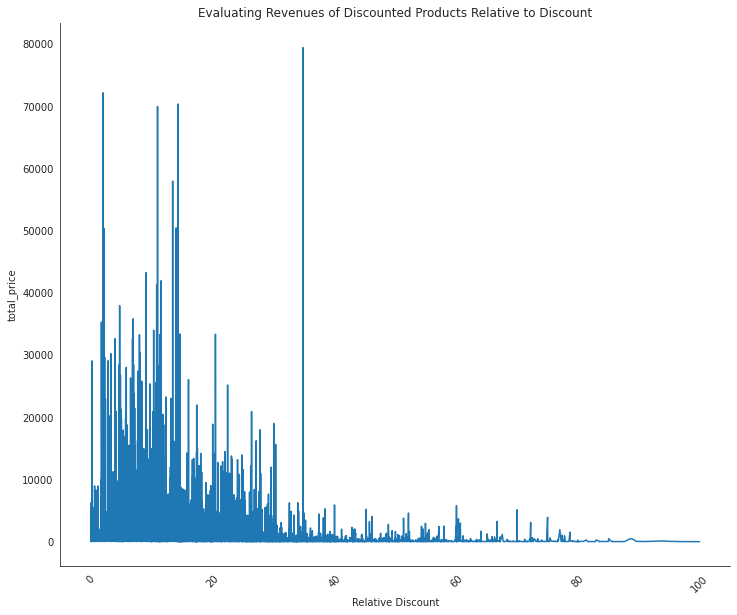

In [ ]:
# look at revenue generated over the distribution of discount_p
disc_p_df = orderlines.query('(any_discount == 1) and (sold == True)').groupby('discount_p').agg({'total_price':'sum'}).reset_index()
plt.subplots(figsize=(12, 10))

ax = sns.lineplot(data=disc_p_df, x="discount_p", y="total_price" ) #, hue="state")
sns.set_style("white")

plt.title('Evaluating Revenues of Discounted Products Relative to Discount')
plt.xlabel('Relative Discount')
plt.setp(ax.get_xticklabels(), rotation=45)
sns.despine() # remove the top and right margin, to make your plot prettier 


In [ ]:
# look at discounted products
# prepare df
# create 
orderlines.discount_p.describe()
dicount_df = orderlines

count    285000.000000
mean         17.002815
std          46.875676
min      -21937.974684
25%           5.975966
50%          13.337779
75%          23.341114
max         200.000000
Name: discount_p, dtype: float64

No handles with labels found to put in legend.


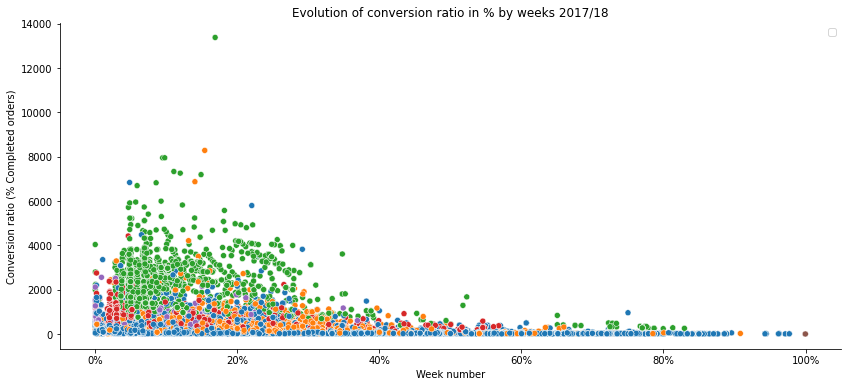

In [ ]:
# look at discounted products
plt.subplots(figsize=(14, 6))

ax = sns.scatterplot(data=orderlines.query('(any_discount == 1) and (sold == True)', engine='python'), x='discount_rel', y='total_price', hue='Category', legend=None)
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(val) for val in vals])
#sns.lineplot(data=p_df, x='disc_p', y='state_perc', hue='year')

plt.legend(facecolor='white')
plt.title('Evolution of conversion ratio in % by weeks 2017/18')
plt.ylabel('Conversion ratio (% Completed orders)')
plt.xlabel('Week number')
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.show()


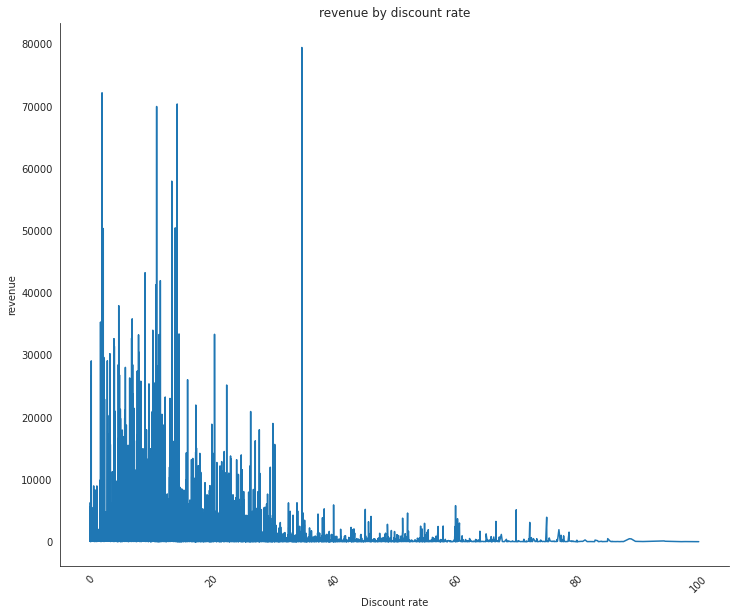

In [ ]:
disc_p_df= orderlines.query('(any_discount == 1) and (sold == True)', engine='python').groupby('discount_p').agg({'total_price' : 'sum'}).rename(columns={'total_price':'revenue'}).reset_index()

plt.subplots(figsize=(12, 10))

ax = sns.lineplot(data=disc_p_df, x="discount_p", y="revenue" ) #, hue="Category")
sns.set_style("white")

plt.title('revenue by discount rate')
plt.xlabel('Discount rate')
plt.setp(ax.get_xticklabels(), rotation=45)
sns.despine() # remove the top and right margin, to make your plot prettier 


In [ ]:
#shravanti

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=orderlines.query('sold == True'), # dataframe we will use to look for the columns information
    x='Category', # x values on our chart
    y='total_discount', # y values on our chart
    #hue='year_month', # group color in our chart
    #order=months, # order x columns
    palette=("rocket_r")
)
plt.title('The Average distribution of Category and discount')
plt.legend(title='Discounts', labels=['92% of total products being discounted', 'among 88% of discount are in positive'])
plt.xlabel('Category') # x label name
plt.ylabel('Total discount')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

In [ ]:
orderlines.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date', 'total_price', 'check_orders', 'price', 'name', 'type', 'state',
       'year', 'month', 'day', 'wday', 'black_fri', 'discount', 'discount_rel',
       'sold', 'Category', 'any_discount', 'year_month', 'total_paid',
       'shipping', 'discount_p'],
      dtype='object')

# trying logit and OLS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
orderlines['price_ln'] = np.log(orderlines['price'])
orderlines['discount_p'] = orderlines['discount_rel']*100
orderlines['black_fri'] = orderlines['black_fri'].astype(int)
orderlines_cat = pd.get_dummies(orderlines, columns=['Category', 'year', 'month'], drop_first=False)
#orderlines_cat.filter(['price_ln', 'price']).head()
orderlines_cat.head()
Category_ls = [col for col in orderlines_cat.columns if 'Category' in col]
#Category_ls
year_ls = [col for col in orderlines_cat.columns if 'year' in col]
month_ls = [col for col in orderlines_cat.columns if 'month' in col]
month_ls.remove('year_month')

X_ls = ['price_ln', 'discount_p', 'black_fri']
X_ls.extend(Category_ls+year_ls+month_ls)
X_ls

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['price_ln',
 'discount_p',
 'black_fri',
 'Category_Accessory',
 'Category_HardDrive',
 'Category_Servers',
 'Category_Service',
 'Category_Software',
 'Category_iMac/MacBook',
 'Category_iPad/Phones',
 'year_month',
 'year_2017',
 'year_2018',
 'month_Apr',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jan',
 'month_Jul',
 'month_Jun',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep']

In [ ]:
X = orderlines_cat.loc[:, orderlines_cat.columns.isin(X_ls)]
X = X.loc[:, ~X.columns.isin(['year_2017', 'Dec', 'Category_iMac/MacBook'])] # set reference categories
y = orderlines_cat.loc[:, orderlines_cat.columns == 'sold']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.491797
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.048      
Dependent Variable:  sold              AIC:               280369.2430
Date:                2022-06-21 14:37  BIC:               280601.5685
No. Observations:    285001            Log-Likelihood:    -1.4016e+05
Df Model:            21                LL-Null:           -1.4717e+05
Df Residuals:        284979            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      8.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
black_fri             0.4769   0.0295  16.1470 0.0000  0.4190  0.5348
discount_rel    

In [ ]:
# logist regession using 'sold' (0/1) as the dependent variable

from operator import concat
import statsmodels.api as sm
from statsmodels.formula.api import logit

formula = ('sold ~ price_ln + discount_p + black_fri + year_2018')
for i in month_ls[:-2]:
  formula = formula + f'+ {i} '
for i in Category_ls[:-2]:
  formula = formula + f'+ {i} '
formula
model = logit(formula = formula, data= orderlines_cat).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.492344
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   sold   No. Observations:               285000
Model:                          Logit   Df Residuals:                   284980
Method:                           MLE   Df Model:                           19
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                 0.04656
Time:                        17:25:36   Log-Likelihood:            -1.4032e+05
converged:                       True   LL-Null:                   -1.4717e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0102      0.041    -24.785      0.000      -1.090      -0.930
price_ln              -0.1257      0.005    -24.580      0.000      -0.136      -0.116
discount_p             0.0085      0.000     29.946      0.000       0.008       0.009
black_fri              0.4824      0.030     16.337      0.000       0.425       0.540
year_2018             -0.0987      0.016     -6.336      0.000      -0.129      -0.068
month_Apr             -0.3668      0.028    -13.095      0.000      -0.422      -0.312
month_Aug              0.0656      0.026      2.559      0.011       0.015       0.116
month_Dec             -0.1918      0.020     -9.754      0.000      -0.230      -0.153
month_Feb             -0.1924      0.021     -8.971      0.000      -0.234      -0.150
month_Jan             -0.0039      0.020     -0.196      0.845      -0.042       0.035
month_Jul              0.2410      0.023     10.625      0.000       0.197       0.286
month_Jun             -0.3266      0.028    -11.561      0.000      -0.382      -0.271
month_Mar             -1.2095      0.028    -43.444      0.000      -1.264      -1.155
month_May             -0.1420      0.027     -5.248      0.000      -0.195      -0.089
month_Nov             -0.0991      0.019     -5.143      0.000      -0.137      -0.061
Category_Accessory     0.3498      0.020     17.293      0.000       0.310       0.389
Category_HardDrive     0.6747      0.020     33.618      0.000       0.635       0.714
Category_Servers       0.6646      0.057     11.617      0.000       0.552       0.777
Category_Service      -0.8392      0.086     -9.811      0.000      -1.007      -0.672
Category_Software     -2.3770      0.095    -24.895      0.000      -2.564      -2.190
======================================================================================
"""

In [ ]:
# marginal effects at sample mean
AME = model.get_margeff(at='mean', method='dydx')
print(AME.summary())
#For example, the AME value of discount_rel is 0.1302
# which can be interpreted as a unit increase (+100%) in discount value increases the probability of having diabetes by 13.02%
# makes no sense??? or just says that the likelihood increases underproportionally to the increase of discount
# yes! when looking at discount percentage [0,100] a 1 unit increase (meaining 1 %) results in P(sold) to increase by 0.13%

        Logit Marginal Effects       
Dep. Variable:                   sold
Method:                          dydx
At:                              mean
                        dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
price_ln              -0.0196      0.001    -24.611      0.000      -0.021      -0.018
discount_p             0.0013   4.41e-05     29.956      0.000       0.001       0.001
black_fri              0.0751      0.005     16.337      0.000       0.066       0.084
year_2018             -0.0154      0.002     -6.337      0.000      -0.020      -0.011
month_Apr             -0.0571      0.004    -13.100      0.000      -0.066      -0.049
month_Aug              0.0102      0.004      2.559      0.011       0.002       0.018
month_Dec             -0.0299      0.003     -9.756      0.000      -0.036      -0.024
month_Feb             -0.0300      0.003     -8.972      0.000   

In [ ]:
orderlines_cat.discount_p.mean() # 17.45%

17.447685919769683

In [ ]:
# see whether logit results change for different categories

formula = ('sold ~ price_ln + discount_p + black_fri + year_2018')
for i in month_ls[:-2]:
  formula = formula + f'+ {i} '

#formula
X = orderlines_cat.loc[:, orderlines_cat.columns.isin(X_ls)]
Macs_df = orderlines_cat.loc[((orderlines_cat['Category_iMac/MacBook'] == 1) | (orderlines_cat['Category_iPad/Phones'] == 1)),:].copy()
model_Mac = logit(formula = formula, data= Macs_df).fit()
model_Mac.summary()

NameError: ignored

In [ ]:
# marginal effects at sample mean for Category iMac/MacBook & iPad/Phones
AME_Mac = model_Mac.get_margeff(at='mean', method='dydx')
print(AME_Mac.summary())
# discout_p still reveals underproportional effect at sample mean

        Logit Marginal Effects       
Dep. Variable:                   sold
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
price_ln      -0.0461      0.002    -29.168      0.000      -0.049      -0.043
discount_p     0.0011   9.16e-05     12.444      0.000       0.001       0.001
black_fri      0.0676      0.007      9.329      0.000       0.053       0.082
year_2018     -0.0258      0.005     -4.736      0.000      -0.036      -0.015
month_Apr     -0.0343      0.009     -3.981      0.000      -0.051      -0.017
month_Aug     -0.0021      0.007     -0.306      0.759      -0.016       0.011
month_Dec     -0.0144      0.005     -2.883      0.004      -0.024      -0.005
month_Feb     -0.0187      0.007     -2.746      0.006      -0.032      -0.005
month_Jan      0.0048      0.006      0.764      0.445    

In [ ]:
Category_iMac/MacBook  
 Category_iPad/Phones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285001 entries, 0 to 293742
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     285001 non-null  int64         
 1   id_order               285001 non-null  int64         
 2   product_id             285001 non-null  int64         
 3   product_quantity       285001 non-null  int64         
 4   sku                    285001 non-null  object        
 5   unit_price             285001 non-null  float64       
 6   date                   285001 non-null  datetime64[ns]
 7   total_price            285001 non-null  float64       
 8   check_orders           285001 non-null  bool          
 9   price                  285001 non-null  float64       
 10  name                   285001 non-null  object        
 11  type                   285001 non-null  object        
 12  state                  285001 non-null  obje

#OLS

In [ ]:
# OLS wrt monthyl revenue and average discount per month
orderlines_cat2 = pd.get_dummies(orderlines, columns=['Category'], drop_first=False)
orderlines_cat2['discount_rel2'] = orderlines_cat2['discount_rel']*orderlines_cat2['discount_rel']
month_df = (orderlines
            .groupby(['year', 'month'])
            .agg({'total_price':'sum', 'discount_rel' : 'mean'})
            .reset_index()
            .merge(orderlines_cat2
                .filter(['year', 'month', 'Category_Accessory', 'Category_HardDrive', 'Category_Servers', 'Category_Service', 'Category_Software', 'Category_iMac/MacBook', 'Category_iPad/Phones'])
                .groupby(['year', 'month'])
                .agg({'Category_Accessory' : 'count', 'Category_HardDrive':'count','Category_Servers':'count', 'Category_Service':'count', 'Category_Software':'count','Category_iMac/MacBook':'count', 'Category_iPad/Phones':'count'})
                , how='left', on=['year', 'month'])
)
month_df.head()
#month_df2 = pd.get_dummies(month_df, columns=['year', 'month'], drop_first=False).copy()
#month_df2.head()
#month_df2.shape # (15, 23) -> use this for graph
#month_df.info()
#month_df.total_price.describe()


,year,month,total_price,discount_rel,Category_Accessory,Category_HardDrive,Category_Servers,Category_Service,Category_Software,Category_iMac/MacBook,Category_iPad/Phones
0,2017,Apr,4217882.34,0.160513,11307,11307,11307,11307,11307,11307,11307
1,2017,Aug,4283447.63,0.173168,11603,11603,11603,11603,11603,11603,11603
2,2017,Dec,17276421.85,0.152066,35454,35454,35454,35454,35454,35454,35454
3,2017,Feb,4214153.05,0.177318,13604,13604,13604,13604,13604,13604,13604
4,2017,Jan,5558820.52,0.218617,20556,20556,20556,20556,20556,20556,20556


In [ ]:
#import statsmodels.api as sm
#import numpy as np
orderlines_cat['discount_rel2'] = orderlines_cat['discount_rel']*orderlines_cat['discount_rel']
orderlines_cat['discount_p2'] = orderlines_cat['discount_p']*orderlines_cat['discount_p']
orderlines_cat['total_price_ln'] = np.log(orderlines['total_price'])

y = orderlines_cat['total_price']
#x = orderlines_cat.loc[:, month_df2.columns != "total_price"]
x = orderlines_cat.loc[:, orderlines_cat.columns.isin(['discount_p', 'discount_p2', 'black_fri', 'year_2018', 'month_Apr', 'month_Aug', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'Category_Accessory', 'Category_HardDrive', 'Category_Servers', 'Category_Service', 'Category_Software', 'Category_iPad/Phones'])] # set reference categories
x = sm.add_constant(x)
model = sm.OLS(y.astype(float), x.astype(float))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     8161.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:56:41   Log-Likelihood:            -2.3470e+06
No. Observations:              284999   AIC:                         4.694e+06
Df Residuals:                  284977   BIC:                         4.694e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2451.4248      7.133    343.681      0.000    2437.445    2465.405
black_fri                8.3006     12.063      0.688      0.491     -15.343      31.944
discount_p              -5.8695      0.281    -20.884      0.000      -6.420      -5.319
discount_p2              0.0200      0.004      5.034      0.000       0.012       0.028
Category_Accessory   -2215.9732      5.777   -383.564      0.000   -2227.297   -2204.650
Category_HardDrive   -2094.6342      7.112   -294.537      0.000   -2108.573   -2080.696
Category_Servers     -1645.9078     21.360    -77.056      0.000   -1687.773   -1604.043
Category_Service     -2342.2421     20.767   -112.788      0.000   -2382.944   -2301.540
Category_Software    -2355.9408     12.394   -190.085      0.000   -2380.233   -2331.649
Category_iPad/Phones -1655.2408      7.701   -214.951      0.000   -1670.334   -1640.148
year_2018               48.7828      5.520      8.837      0.000      37.963      59.602
month_Apr              -37.7765      9.880     -3.824      0.000     -57.141     -18.412
month_Aug              -54.2374      9.790     -5.540      0.000     -73.425     -35.049
month_Feb              -45.8113      7.682     -5.963      0.000     -60.868     -30.755
month_Jan              -27.0861      7.134     -3.797      0.000     -41.069     -13.104
month_Jul              -46.0962      8.799     -5.239      0.000     -63.342     -28.850
month_Jun              -28.0627      9.940     -2.823      0.005     -47.544      -8.581
month_Mar               13.9199      8.126      1.713      0.087      -2.008      29.847
month_May              -58.4482      9.999     -5.845      0.000     -78.046     -38.850
month_Nov              -14.8676      6.884     -2.160      0.031     -28.360      -1.375
month_Oct              -46.1903      8.846     -5.221      0.000     -63.529     -28.852
month_Sep              -64.8675      9.375     -6.920      0.000     -83.241     -46.494
==============================================================================
Omnibus:                  1106785.591   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2512255480394.534
Skew:                          93.056   Prob(JB):                         0.00
Kurtosis:                   14546.881   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

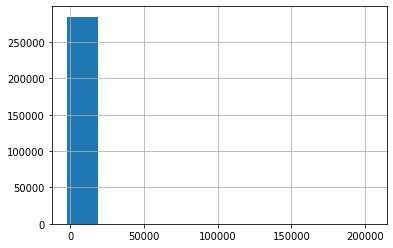

In [ ]:
results.resid
#sns.scatterplot(data=orderlines.query('(any_discount == 1) and (sold == True)', engine='python'), x='discount_rel', y='discount', hue='Category')
sns.scatterplot(data=orderlines.query('(any_discount == 1) and (sold == True)', engine='python'), x='discount_rel', y='discount', hue='Category')

In [ ]:
ax = sns.scatterplot(data=orderlines.query('(any_discount == 1) and (sold == True)', engine='python'), x='discount_rel', y='discount', hue='Category')
vals = ax.get_xticks()
# only those that were sold
y = orderlines_cat_sold = orderlines_cat.query('sold == True').copy()

#import statsmodels.api as sm
#import numpy as np
y = orderlines_cat_sold['total_price']
#x = orderlines_cat.loc[:, month_df2.columns != "total_price"]
x = orderlines_cat_sold.loc[:, orderlines_cat.columns.isin(['discount_rel', 'discount_rel2', 'black_fri', 'year_2018', 'month_Apr', 'month_Aug', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'Category_Accessory', 'Category_HardDrive', 'Category_Servers', 'Category_Service', 'Category_Software', 'Category_iPad/Phones'])] # set reference categories
x = sm.add_constant(x)
model2 = sm.OLS(y.astype(float), x.astype(float))
results2 = model2.fit()
results2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     6601.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:44:16   Log-Likelihood:            -4.2796e+05
No. Observations:               60375   AIC:                         8.560e+05
Df Residuals:                   60353   BIC:                         8.562e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2124.1353      6.481    327.772      0.000    2111.434    2136.837
black_fri               27.8847      7.056      3.952      0.000      14.055      41.715
discount_rel          -529.8947     19.769    -26.804      0.000    -568.643    -491.147
Category_Accessory   -1931.8476      5.553   -347.922      0.000   -1942.731   -1920.965
Category_HardDrive   -1826.1057      6.053   -301.681      0.000   -1837.970   -1814.242
Category_Servers     -1448.4170     15.102    -95.911      0.000   -1478.016   -1418.818
Category_Service     -2030.0073     23.705    -85.635      0.000   -2076.470   -1983.545
Category_Software    -1912.7610     27.326    -69.999      0.000   -1966.319   -1859.203
Category_iPad/Phones -1477.4899      7.004   -210.957      0.000   -1491.217   -1463.763
year_2018               14.1571      4.007      3.533      0.000       6.304      22.010
month_Apr              -23.5196      7.186     -3.273      0.001     -37.605      -9.435
month_Aug              -22.0403      6.340     -3.476      0.001     -34.468      -9.613
month_Feb              -19.4654      5.492     -3.544      0.000     -30.230      -8.701
month_Jan              -11.7083      4.786     -2.446      0.014     -21.089      -2.328
month_Jul              -13.9430      5.537     -2.518      0.012     -24.796      -3.090
month_Jun               -1.3944      7.246     -0.192      0.847     -15.597      12.809
month_Mar               -5.2064      8.030     -0.648      0.517     -20.945      10.532
month_May              -36.2649      6.824     -5.314      0.000     -49.641     -22.889
month_Nov               14.3042      4.843      2.953      0.003       4.811      23.797
month_Oct              -14.1048      5.751     -2.452      0.014     -25.377      -2.832
month_Sep              -15.4408      6.441     -2.397      0.017     -28.065      -2.817
discount_rel2          367.4494     28.388     12.944      0.000     311.808     423.091
==============================================================================
Omnibus:                    66988.662   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25424575.294
Skew:                           5.170   Prob(JB):                         0.00
Kurtosis:                     102.999   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# only those that were sold and taking the ln(total_price) as y
y = orderlines_cat_sold = orderlines_cat.query('sold == True').copy()

#import statsmodels.api as sm
#import numpy as np
y = orderlines_cat_sold['total_price_ln']
#x = orderlines_cat.loc[:, month_df2.columns != "total_price"]
x = orderlines_cat_sold.loc[:, orderlines_cat.columns.isin(['discount_rel', 'discount_rel2', 'black_fri', 'year_2018', 'month_Apr', 'month_Aug', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'Category_Accessory', 'Category_HardDrive', 'Category_Servers', 'Category_Service', 'Category_Software', 'Category_iPad/Phones'])] # set reference categories
x = sm.add_constant(x)
model2 = sm.OLS(y.astype(float), x.astype(float))
results2 = model2.fit()
results2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_price_ln   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     4167.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:44:25   Log-Likelihood:                -79245.
No. Observations:               60375   AIC:                         1.585e+05
Df Residuals:                   60353   BIC:                         1.587e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.8129      0.020    388.676      0.000       7.773       7.852
black_fri                0.2154      0.022      9.840      0.000       0.172       0.258
discount_rel            -2.0675      0.061    -33.716      0.000      -2.188      -1.947
Category_Accessory      -3.3078      0.017   -192.058      0.000      -3.342      -3.274
Category_HardDrive      -2.3722      0.019   -126.345      0.000      -2.409      -2.335
Category_Servers        -1.2515      0.047    -26.718      0.000      -1.343      -1.160
Category_Service        -3.7280      0.074    -50.702      0.000      -3.872      -3.584
Category_Software       -2.6277      0.085    -31.002      0.000      -2.794      -2.462
Category_iPad/Phones    -1.3156      0.022    -60.558      0.000      -1.358      -1.273
year_2018                0.1113      0.012      8.954      0.000       0.087       0.136
month_Apr               -0.1659      0.022     -7.441      0.000      -0.210      -0.122
month_Aug               -0.0919      0.020     -4.672      0.000      -0.130      -0.053
month_Feb               -0.1298      0.017     -7.618      0.000      -0.163      -0.096
month_Jan               -0.1425      0.015     -9.597      0.000      -0.172      -0.113
month_Jul               -0.0875      0.017     -5.093      0.000      -0.121      -0.054
month_Jun               -0.1080      0.022     -4.806      0.000      -0.152      -0.064
month_Mar               -0.1008      0.025     -4.049      0.000      -0.150      -0.052
month_May               -0.1412      0.021     -6.668      0.000      -0.183      -0.100
month_Nov                0.0803      0.015      5.344      0.000       0.051       0.110
month_Oct               -0.0452      0.018     -2.533      0.011      -0.080      -0.010
month_Sep               -0.1036      0.020     -5.186      0.000      -0.143      -0.064
discount_rel2           -0.8404      0.088     -9.544      0.000      -1.013      -0.668
==============================================================================
Omnibus:                     1239.727   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2015.274
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                       3.802   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### total_price as y
discounts have a significant negative correlation with revenue, while it seems NOT to be quadratic relationship

### total_price_ln as y
discounts have a significant negative correlation with revenue, while it seems to be quadratic relationship, that even increases the negative correlation

In [ ]:
orderlines_cat_sold.discount_rel.mean()  # 0.20984184325250663
0.21*(-529.8947) + ((0.21**2)*367.4494)  # average effect -95.07336845999998

-95.07336845999998

In [ ]:
x.head()

,const,id,id_order,product_id,product_quantity,sku,unit_price,date,check_orders,price,...,discount_rel,sold,price_ln,discount_p,Category_Accessory,Category_HardDrive,Category_Servers,Category_Service,Category_Software,Category_iPad/Phones
0,1.0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,True,34.99,...,0.457274,0,3.555062,45.727351,1,0,0,0,0,0
1,1.0,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,True,429.00,...,0.069930,0,6.061457,6.993007,1,0,0,0,0,0
2,1.0,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,True,699.00,...,0.321817,0,6.549651,32.181688,1,0,0,0,0,0
3,1.0,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,True,79.00,...,0.134304,0,4.369448,13.430380,0,1,0,0,0,0
4,1.0,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,True,29.90,...,0.206020,0,3.397858,20.602007,1,0,0,0,0,0


In [ ]:
orderlines_cat.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date', 'total_price', 'check_orders', 'price', 'name', 'type', 'state',
       'day', 'wday', 'black_fri', 'discount', 'discount_rel', 'sold',
       'price_ln', 'discount_p', 'Category_Accessory', 'Category_HardDrive',
       'Category_Servers', 'Category_Service', 'Category_Software',
       'Category_iMac/MacBook', 'Category_iPad/Phones', 'year_2017',
       'year_2018', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')